### Your name:

<pre> NAME HERE</pre>

### Collaborators:

<pre> Enter the name of the people you worked with if any</pre>


# Assignment for Module 4: Clustering

## Description

In this assignment you will study the electric demand (power) of clients in Portugal, during 2013 and 2014.

The data$^1$ available contains 370 time series, corresponding to the electric demand$^2$ for 370 clients, between 2011 and 2014. 

In this guided exercise you will use clustering techniques to understand the typical behaviour during 2013-2014.

#### 1. Data:
https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014#

#### 2. Electric Demand:
http://www.think-energy.net/KWvsKWH.htm


## Data Preparation

Start by downloading the data to a local directory and modify the "pathToFile" and "fileName" variables, if needed

In [2]:
pathToFile = r"C:\\path\\to\\file\\"
fileName = 'LD2011_2014.txt'

In [11]:
a='1,220'
a.replace(',', '')

'1220'

In [8]:
x='1,1000'
x.replace('0','2')

'1,1222'

In [ ]:
print('G','F', sep='', end='')
print('G')
#\n provides new line after printing the year
print('09','12','2016', sep='-', end='\n')
  
print('Red','Green','Blue', sep=',', end='@')
print('geeksforgeeks')

In [24]:
import fileinput as fi
with fi.input(files=[r'text1.txt',r'text2.txt',r'text3.txt'], inplace=True, backup='.bak') as file:  ## fi.input and fi.FileInput behave the same
    for line in file:
       line.replace(',','!')
       print(line.replace(',','!'), end='')

In [14]:
?fi.FileInput

Init signature:
fi.FileInput(
    files=None,
    inplace=False,
    backup='',
    *,
    mode='r',
    openhook=None,
    encoding=None,
    errors=None,
)
Docstring:     
FileInput([files[, inplace[, backup]]], *, mode=None, openhook=None)

Class FileInput is the implementation of the module; its methods
filename(), lineno(), fileline(), isfirstline(), isstdin(), fileno(),
nextfile() and close() correspond to the functions of the same name
in the module.
In addition it has a readline() method which returns the next
input line, and a __getitem__() method which implements the
sequence behavior. The sequence must be accessed in strictly
sequential order; random access and readline() cannot be mixed.
File:           c:\users\ebrah\anaconda3\envs\tensorflowenv\lib\fileinput.py
Type:           type
Subclasses:     

In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42)

In [ ]:
pathToFile=".\\electricityloaddiagrams20112014\\"
fileName='LD2011_2014.txt'

In [28]:
# Replace "," by ".", otherwise the numbers will be in the form 2,3445 instead of 2.3445
import fileinput

with fileinput.FileInput(files=[pathToFile+fileName], inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(",", "."), end='') 

In [36]:
# Create dataframe
import pandas as pd
data = pd.read_csv(pathToFile+fileName, sep=";", header=0, index_col=0)

In [39]:
data_transposed=data.transpose() 

In [40]:
data_transposed.head(5)

,2011-01-01 00:15:00,2011-01-01 00:30:00,2011-01-01 00:45:00,2011-01-01 01:00:00,2011-01-01 01:15:00,2011-01-01 01:30:00,2011-01-01 01:45:00,2011-01-01 02:00:00,2011-01-01 02:15:00,2011-01-01 02:30:00,...,2014-12-31 21:45:00,2014-12-31 22:00:00,2014-12-31 22:15:00,2014-12-31 22:30:00,2014-12-31 22:45:00,2014-12-31 23:00:00,2014-12-31 23:15:00,2014-12-31 23:30:00,2014-12-31 23:45:00,2015-01-01 00:00:00
MT_001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.538071,1.269036,2.538071,2.538071,1.269036,2.538071,2.538071,2.538071,1.269036,2.538071
MT_002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.048364,22.048364,22.048364,22.048364,22.048364,22.048364,21.337127,20.625889,21.337127,19.914651
MT_003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619,1.737619
MT_004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,156.504065,164.634146,160.569106,162.601626,156.504065,150.406504,166.666667,162.601626,166.666667,178.861789
MT_005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.585366,93.902439,87.804878,80.487805,85.365854,85.365854,81.707317,82.926829,85.365854,84.146341


### Quick data inspection

In [37]:
data.head(5)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 00:45:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-01-01 01:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.tail(2)

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.17524,225.589226,64.685315,72.043011,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541
2015-01-01 00:00:00,2.538071,19.914651,1.737619,178.861789,84.146341,279.761905,10.17524,249.158249,62.937063,69.892473,...,188.436831,27800.0,1409.282700,954.545455,27.379400,4.095963,628.621598,131.886477,673.020528,7135.135135


In [48]:
data.shape

(140256, 370)

#### As can be seen, the dataframe contains a row for each interval of 15 minutes between Jan 1, 2011 to Dec 31 2014. There are 370 columns corresponding 370 clients. The dataframe is indexed by the timestamp.

Since the frequency is 15 minutes, each day provides $24\times 4 = 96$ datapoints, which multiplied by 365 days and 4 years (plus 1 day in Feb 29, 2012) gives: $96 \times 365 \times 4 + 96 = 140256$, as observed in data.shape

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140256 entries, 2011-01-01 00:15:00 to 2015-01-01 00:00:00
Columns: 370 entries, MT_001 to MT_370
dtypes: float64(370)
memory usage: 397.0+ MB


<Axes: >

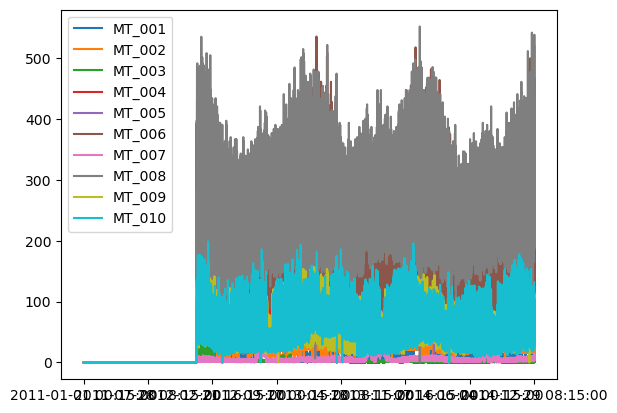

In [60]:
df=data.iloc[:,0:10]
df.plot()

<Axes: >

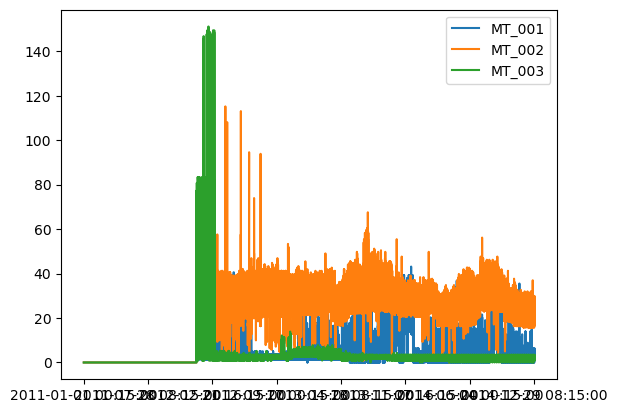

In [61]:
df=data.iloc[:, 0:3]
df.plot()

In [10]:
data.describe()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
count,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,...,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000,140256.000000
mean,3.970785,20.768480,2.918308,82.184490,37.240309,141.227385,4.521338,191.401476,39.975354,42.205152,...,218.213701,37607.987537,1887.427366,2940.031734,65.413150,9.269709,424.262904,94.704717,625.251734,8722.355145
std,5.983965,13.272415,11.014456,58.248392,26.461327,98.439984,6.485684,121.981187,29.814595,33.401251,...,204.833532,38691.954832,1801.486488,2732.251967,65.007818,10.016782,274.337122,80.297301,380.656042,9195.155777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.844950,0.000000,36.585366,15.853659,71.428571,0.565291,111.111111,13.986014,9.677419,...,5.710207,0.000000,0.000000,0.000000,13.037810,0.000000,0.000000,30.050083,83.944282,0.000000
50%,1.269036,24.893314,1.737619,87.398374,39.024390,157.738095,2.826456,222.222222,40.209790,40.860215,...,131.334761,24100.000000,1050.632911,2136.363636,31.290743,7.021650,525.899912,76.794658,758.064516,0.000000
75%,2.538071,29.871977,1.737619,115.853659,54.878049,205.357143,4.522329,279.461279,57.692308,61.290323,...,403.283369,54800.000000,3312.236287,5363.636364,108.213820,11.702750,627.743635,151.919866,875.366569,17783.783784
max,48.223350,115.220484,151.172893,321.138211,150.000000,535.714286,44.657999,552.188552,157.342657,198.924731,...,852.962170,192800.000000,7751.054852,12386.363636,335.071708,60.269163,1138.718174,362.270451,1549.120235,30918.918919


### Plot the 2 days of 2012 for the first 2 clients

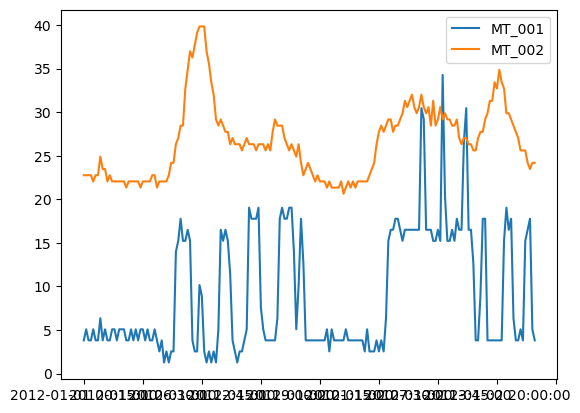

In [62]:
data_example = data.loc['2012-01-01 00:15:00':'2012-01-03 00:00:00'][['MT_001','MT_002']]
data_example.plot()
plt.show()

#### We quickly note that the main difference between the curves is the level (also seen on the means in df.describe()), so we know we will have to somehow normalize the curves, in order for the clustering technique to capture the behaviour of the consumption throughout the day, rather than the overall level.

### Data for the analysis

We focus on 2013 and 2014 because these are the years with lower number of clients having zero demand

In [63]:
data2011 = data.loc['2011-01-01 00:15:00':'2012-01-01 00:00:00']
data2012 = data.loc['2012-01-01 00:15:00':'2013-01-01 00:00:00']
data2013 = data.loc['2013-01-01 00:15:00':'2014-01-01 00:00:00']
data2014 = data.loc['2014-01-01 00:15:00':'2015-01-01 00:00:00']

In [68]:
data2011.shape

(35040, 370)

In [71]:
# Check number of days
print(data2011.shape[0]/96)
print(data2012.shape[0]/96)
print(data2013.shape[0]/96)
print(data2014.shape[0]/96)

365.0
366.0
365.0
365.0


In [72]:
# See number of clients with 0 demand per year
print(sum(data2011.mean()==0))
print(sum(data2012.mean()==0))
print(sum(data2013.mean()==0))
print(sum(data2014.mean()==0))

210
37
21
1


In [93]:
clients=data.columns
data_2013_2014=pd.concat([data2013, data2014])


MT_001    False
MT_002    False
MT_003    False
MT_004    False
MT_005    False
          ...  
MT_366    False
MT_367    False
MT_368    False
MT_369    False
MT_370    False
Length: 370, dtype: bool

In [94]:
clients = data2011.columns
clients_no_demand = clients[data2013.mean()==0] # clients with 0 demand
data_13_14 = pd.concat([data2013, data2014]) # appending 2013 and 2014
data_13_14 = data_13_14.drop(clients_no_demand, axis=1) # drop clients with 0 demand
print(data_13_14.shape)
print(sum(data_13_14.mean()==0)) # check that there are no clients with 0 demand

(70080, 349)
0


## Getting average curves per client

In [97]:
data = data_13_14.copy() # weekdays weekends, data2011, data2012, data2013, data2014

In [100]:
data.index

Index(['2013-01-01 00:15:00', '2013-01-01 00:30:00', '2013-01-01 00:45:00',
       '2013-01-01 01:00:00', '2013-01-01 01:15:00', '2013-01-01 01:30:00',
       '2013-01-01 01:45:00', '2013-01-01 02:00:00', '2013-01-01 02:15:00',
       '2013-01-01 02:30:00',
       ...
       '2014-12-31 21:45:00', '2014-12-31 22:00:00', '2014-12-31 22:15:00',
       '2014-12-31 22:30:00', '2014-12-31 22:45:00', '2014-12-31 23:00:00',
       '2014-12-31 23:15:00', '2014-12-31 23:30:00', '2014-12-31 23:45:00',
       '2015-01-01 00:00:00'],
      dtype='object', length=70080)

In [102]:
data['hour'] = data.index.map(lambda x: x[11:])

In [104]:
data.head(5) 

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370,hour
2013-01-01 00:15:00,2.538071,22.759602,2.606429,138.211382,63.414634,255.952381,4.522329,239.057239,57.692308,78.494624,...,22300.0,886.075949,1000.000000,16.949153,6.436513,616.330114,76.794658,731.671554,8086.486486,00:15:00
2013-01-01 00:30:00,1.269036,22.759602,2.606429,138.211382,63.414634,264.880952,5.652911,228.956229,57.692308,76.344086,...,21000.0,864.978903,909.090909,18.252934,3.510825,564.530290,76.794658,727.272727,8086.486486,00:30:00
2013-01-01 00:45:00,2.538071,22.759602,2.606429,134.146341,60.975610,250.000000,5.652911,239.057239,54.195804,76.344086,...,18200.0,860.759494,840.909091,16.949153,5.851375,590.869183,68.447412,730.205279,7848.648649,00:45:00
2013-01-01 01:00:00,1.269036,23.470839,2.606429,130.081301,56.097561,226.190476,6.218202,249.158249,50.699301,75.268817,...,15800.0,860.759494,840.909091,16.949153,4.095963,575.065847,58.430718,722.873900,7848.648649,01:00:00
2013-01-01 01:15:00,3.807107,23.470839,2.606429,130.081301,58.536585,229.166667,6.783493,239.057239,57.692308,74.193548,...,15000.0,793.248945,818.181818,16.949153,4.095963,570.676032,60.100167,748.533724,7610.810811,01:15:00


In [112]:
data['hour'].head(10)

2013-01-01 00:15:00    00:15:00
2013-01-01 00:30:00    00:30:00
2013-01-01 00:45:00    00:45:00
2013-01-01 01:00:00    01:00:00
2013-01-01 01:15:00    01:15:00
2013-01-01 01:30:00    01:30:00
2013-01-01 01:45:00    01:45:00
2013-01-01 02:00:00    02:00:00
2013-01-01 02:15:00    02:15:00
2013-01-01 02:30:00    02:30:00
Name: hour, dtype: object

### Getting average curves per client

In [113]:
data.groupby(['hour']).mean()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
hour,,,,,,,,,,,,,,,,,,,,,
00:00:00,5.008344,26.045909,1.938755,130.551843,60.374206,191.136660,7.772366,242.027582,51.585401,54.837237,...,119.625903,36306.438356,1333.223513,1652.677460,37.831080,16.499275,676.790504,148.683880,799.235729,17333.891151
00:15:00,4.917947,25.833512,1.911381,125.863125,57.586034,179.297130,7.426996,232.516950,50.016764,53.424658,...,119.540837,32137.534247,979.064794,1443.711083,33.942955,16.580232,659.875882,155.464587,795.100028,17466.227323
00:30:00,4.984007,24.754964,1.909001,121.566990,55.476111,171.554958,7.179972,225.317098,48.843280,52.514361,...,111.557303,27249.178082,938.598925,1324.501868,31.044275,15.940589,655.911819,153.879754,777.630258,17605.301740
00:45:00,4.980530,24.656560,1.899480,117.961354,53.630137,164.452870,7.013482,218.698400,47.574001,51.150390,...,97.361963,24234.109589,837.292642,1134.433375,30.245932,15.121396,644.171167,151.146889,769.361869,17589.559422
01:00:00,4.963146,23.665699,1.863775,111.732932,52.123288,155.850457,6.843894,212.291868,46.570553,50.223892,...,91.873711,20504.383562,812.213167,1110.118306,29.617260,15.693709,640.233562,148.288243,763.943679,17574.838949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:45:00,5.175231,26.859448,2.029206,154.276646,69.679252,241.809361,8.759689,282.270190,60.855925,63.423185,...,214.890538,58302.328767,2422.484249,3540.815691,104.439999,17.210257,704.703718,153.067899,825.106456,17683.613476
23:00:00,5.319519,26.919854,1.973269,148.123399,68.810558,234.515656,8.617205,275.485448,59.574672,62.060686,...,186.405014,52881.095890,2283.053003,3428.486924,97.120966,17.076397,706.203471,150.689505,821.116378,17534.542762
23:15:00,5.356025,26.839962,1.962558,141.869919,67.398931,223.434442,8.373278,267.040266,57.366606,59.584622,...,164.177251,47958.219178,2119.206982,2913.449564,82.870461,16.923299,697.439475,149.175567,827.424376,17311.010737


In [115]:
datagrouped = data.groupby("hour")
average_curves = datagrouped.agg("mean")
average_curves.shape 

(96, 349)

#### The dataframe average_curves contains the 349 typical weekday electric demands

#### We now divide each curve by its mean, so that all curves have mean 1

In [116]:
average_curves_norm = average_curves/(average_curves.mean())

#### Plot the first 2 and last 2 clients

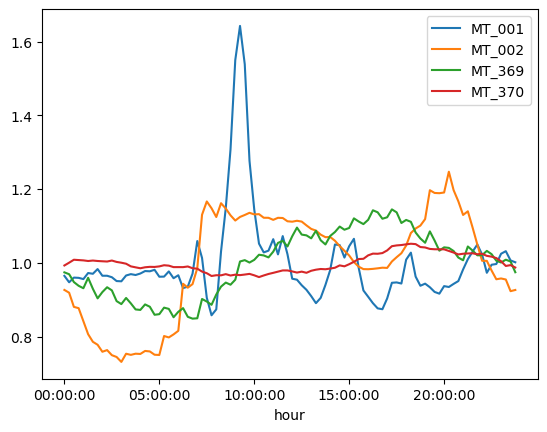

In [117]:
average_curves_norm[['MT_001','MT_002','MT_369','MT_370']].plot()
plt.show()

## Clustering Analysis on the average normizalied curves

In [118]:
X = average_curves_norm.copy()
X = np.array(X.T) # put it on the right format

In [120]:
X.shape

(349, 96)

## Exercise 1:

a. Using the functions described in Module 2, determine what a convenient number of clusters based on _intertia_ and based on _silhouette_. Justify your choice

b. Make a plot for each cluster, that includes:
    - The number of clients in the cluster (you can put this in the title of the plot)
    - All the curves in the cluster
    - The curve corresponding to the centroid of the cluster (make this curve thicker to distinguish it from the individual curves)
    
You can do 2 separate plots for each cluster if you prefer (one for the individual curves, one for the centroid)

In [121]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
random.seed(42) 

In [124]:
def getInertia(X,kmeans):
    ''' This function returns the exact same value as the attribute inertia_ of kmeans'''
    inertia = 0
    for J in range(len(X)):
        inertia = inertia + np.linalg.norm(X[J] - kmeans.cluster_centers_[kmeans.labels_[J]])**2
    return inertia

In [125]:
def getInertia2(X,kmeans):
    ''' This function is analogous to getInertia, but with respect to the 2nd closest center, rather than closest one'''
    inertia2 = 0
    for J in range(len(X)):
        L = min(1,len(kmeans.cluster_centers_)-1) # this is just for the case where there is only 1 cluster at all
        dist_to_center = sorted([np.linalg.norm(X[J] - z)**2 for z in kmeans.cluster_centers_])[L]
        inertia2 = inertia2 + dist_to_center
    return inertia2 

In [126]:
inertias_1 = []
inertias_2 = []
silhouette_avgs = []
max_K = 15
for k in np.arange(1,max_K+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)    
    inertias_1 = inertias_1 + [kmeans.inertia_]
    inertias_2 = inertias_2 + [getInertia2(X,kmeans)]
    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(X, kmeans.labels_)]

C:\Users\ebrah\anaconda3\envs\TensorFlowENV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ebrah\anaconda3\envs\TensorFlowENV\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\ebrah\anaconda3\envs\TensorFlowENV\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ebrah\anaconda3\envs\TensorFlowENV\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarnin

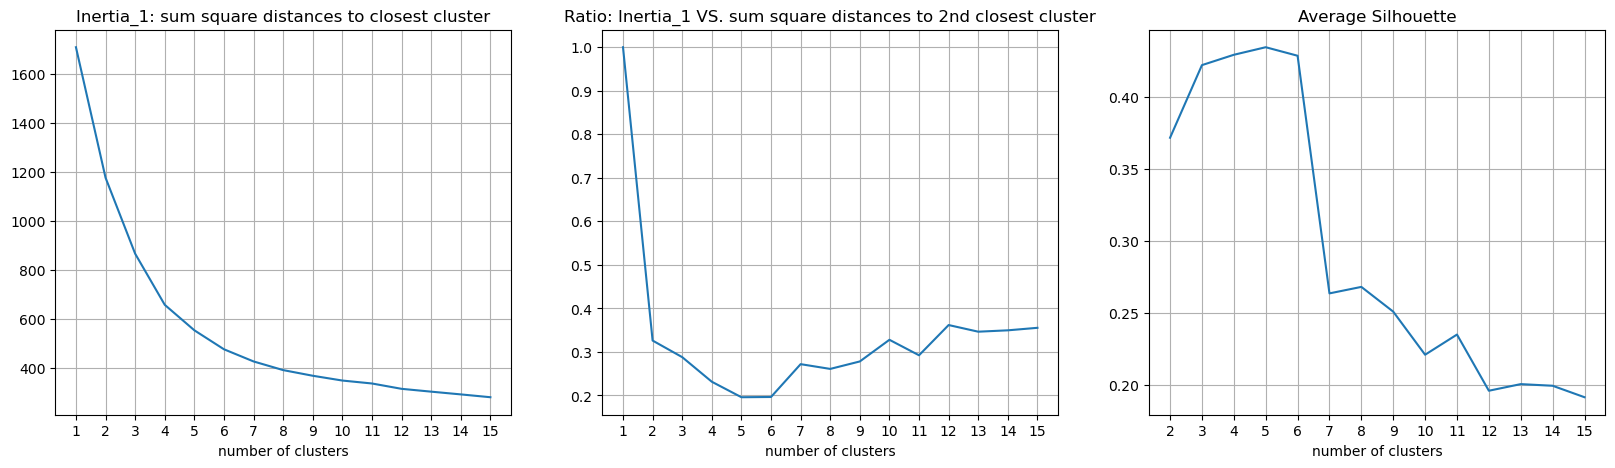

In [127]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title("Inertia_1: sum square distances to closest cluster")
plt.plot(np.arange(1,max_K+1),inertias_1)
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters')
plt.grid()
    
plt.subplot(1,3,2)    
plt.title("Ratio: Inertia_1 VS. sum square distances to 2nd closest cluster")
plt.plot(np.arange(1,max_K+1),np.array(inertias_1)/np.array(inertias_2))
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.subplot(1,3,3)  
plt.title("Average Silhouette")
plt.plot(np.arange(2,max_K+1), silhouette_avgs)
plt.xticks(np.arange(2,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.show()

### Part a
##### Best K VALUE for K-means:

a. Based on the Inertia_1 diagram, the elbow of the diagram is when K=5.


b. Baes on the Ratio (Inertia_1 vs Inertia_2), the min value is K=5 again.


c. Regarding the Silhouette metric, K=5 is tha value that graph has its maximum, so K=5 is optimal number of K that we could consider for grouping the clients based on their average hourly energy consumption.

### Part b

#### plots for the clusters:

First we chose K=5 and then cluster our data based on it:

In [ ]:

kmeans = KMeans(n_clusters=5, random_state=0).fit(X)         

##### Now we need to get the label for each client:

In [130]:
kmeans_client_labels=kmeans.predict(X)
kmeans_client_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 3, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 0, 2,
       1, 0, 0, 0, 2, 4, 4, 4, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

##### Now we have to extract each group based on their label and plot the graphs for clients in the same cluster:
#### I have calculated the number of custemrs as well fpr each cluster

<Figure size 640x480 with 0 Axes>

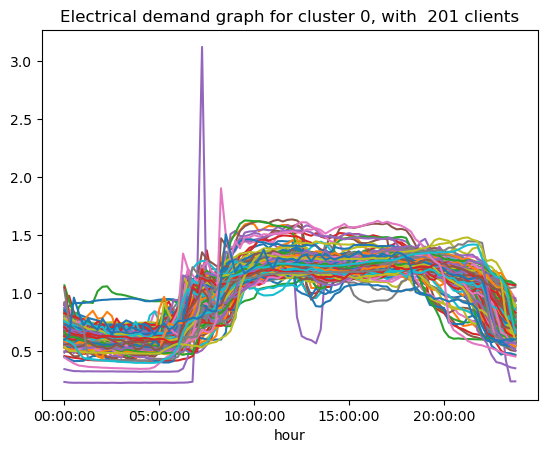

<Figure size 640x480 with 0 Axes>

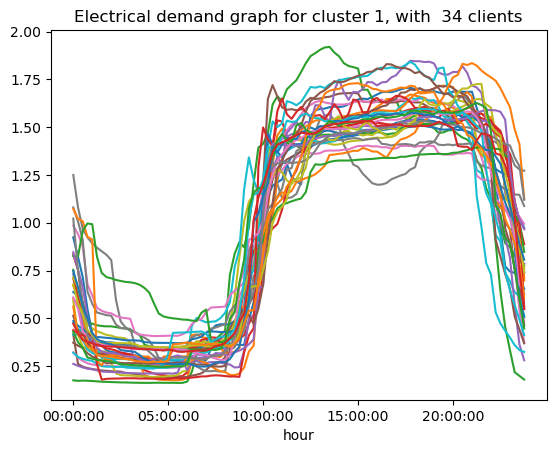

<Figure size 640x480 with 0 Axes>

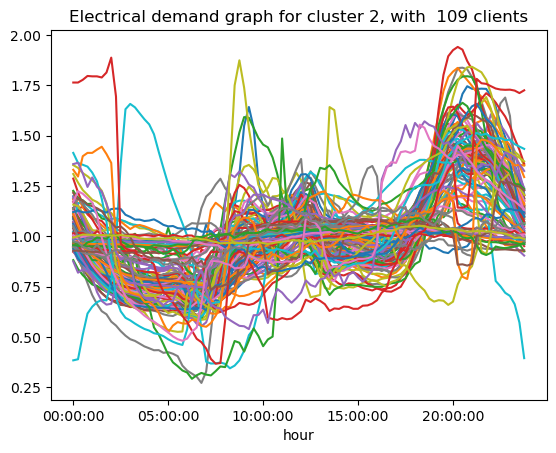

<Figure size 640x480 with 0 Axes>

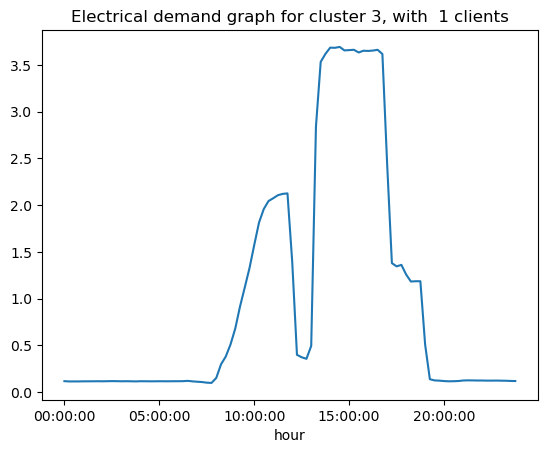

<Figure size 640x480 with 0 Axes>

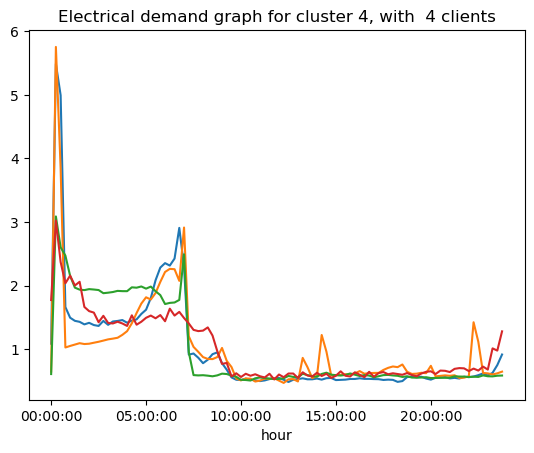

In [166]:
names=average_curves_norm.columns
K=5

for k in range(K):
   plt.figure()
   ax=average_curves_norm.drop(names[list(kmeans_client_labels!=k)], axis=1).plot(legend=False)   ### Legend is set to be false, it took a lot of place
   client_number=np.sum(kmeans_client_labels==k)
   ax.set_title('Electrical demand graph for cluster %s, with  %d clients' %(k ,client_number))
   plt.show()
    

## Exercises 2

In this exercise you work with the daily curves of 1 single client.

First you create a list of arrays, each array containing a normalized curve for a day. The list contains 730 arrays, one for each of the days of 2013 and 2014.

a. Determine the optimal value for k-means. 

b. What are the clusters that you obtained represent?

In [173]:
client = 'MT_022'
oneClient = data_13_14[client]
X = [] # a list of arrays, each array being a normalized curve for a day
for J in range(2*365):
    X.extend([np.array(oneClient[J*96:(J+1)*96])])#/np.mean(oneClient[J*96:(J+1)*96])]) 

#### I am going to cluster the data based on the days (which hours of the day have higher power demand or lower demand for client number 22:)

In [ ]:
import numpy as np
X_array=np.array(X)
X_squeezed=np.squeeze(X_array)
X=X_squeezed.T

#X=X_squeezed

inertias_1 = []
inertias_2 = []
silhouette_avgs = []
max_K = 15
for k in np.arange(1,max_K+1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)    
    inertias_1 = inertias_1 + [kmeans.inertia_]
    inertias_2 = inertias_2 + [getInertia2(X,kmeans)]
    if k>1:
        silhouette_avgs = silhouette_avgs + [silhouette_score(X, kmeans.labels_)]

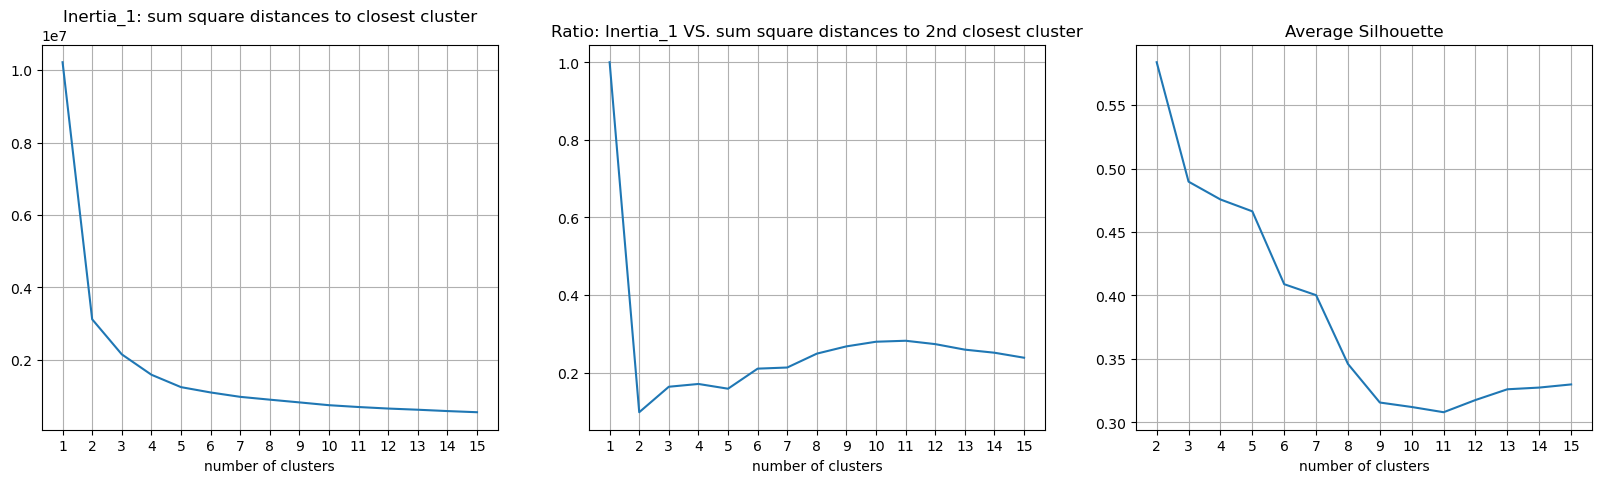

In [224]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plt.title("Inertia_1: sum square distances to closest cluster")
plt.plot(np.arange(1,max_K+1),inertias_1)
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters')
plt.grid()
    
plt.subplot(1,3,2)    
plt.title("Ratio: Inertia_1 VS. sum square distances to 2nd closest cluster")
plt.plot(np.arange(1,max_K+1),np.array(inertias_1)/np.array(inertias_2))
plt.xticks(np.arange(1,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.subplot(1,3,3)  
plt.title("Average Silhouette")
plt.plot(np.arange(2,max_K+1), silhouette_avgs)
plt.xticks(np.arange(2,max_K+1))
plt.xlabel('number of clusters')
plt.grid()

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)  
kmeans_client_labels=kmeans.predict(X)
kmeans_client_labels

In [228]:
X.shape


(96, 730)

### It seems that K=2 is the best choice!

In [220]:
kmeans_client_labels.shape

(96,)

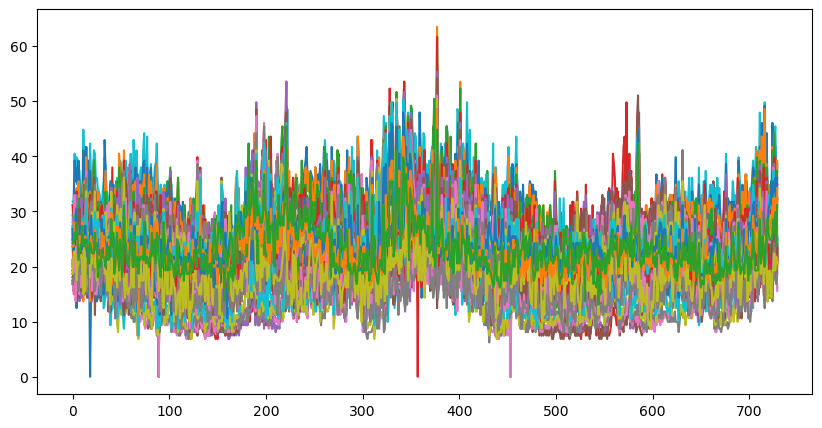

In [229]:
X_for_plot=X.T
#plt.subplot(1,2)
plt.figure(figsize=(10,5))
x_cluster_1=X_for_plot[:,np.array(kmeans_client_labels==0)]
x_cluster_2=X_for_plot[:,np.array(kmeans_client_labels==1)]
for i in range(x_cluster_1.shape[1]):
    plt.plot(x_cluster_1[:,i])
plt.show()

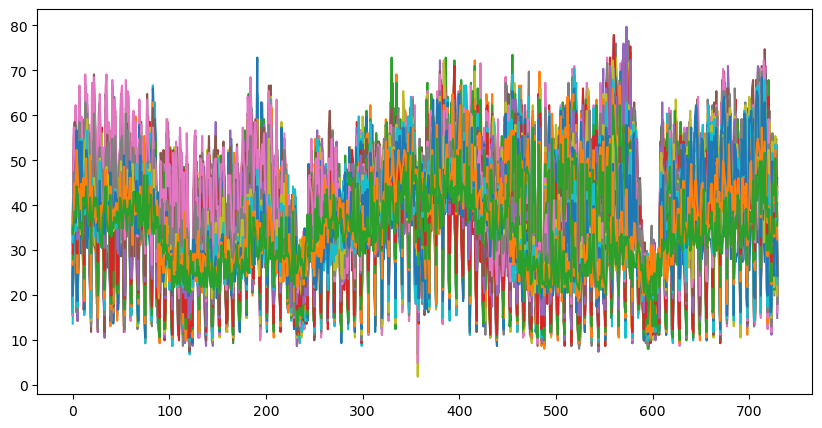

In [230]:
plt.figure(figsize=(10,5))
for i in range(x_cluster_2.shape[1]):
    plt.plot(x_cluster_2[:,i])

#### The following cell generates a list of all the days in the two years 2013-2014, which is helpful to answer part (b)

In [416]:
from datetime import date, timedelta

d1 = date(2013, 1, 1)  # start date
d2 = date(2014, 12, 31)  # end date
delta = d2 - d1         # timedelta
daysyear = []
D = {0:'mon', 1:'tue', 2:'wed', 3:'thu', 4:'fri', 5:'sat', 6:'sun'}
for i in range(delta.days + 1):
    daysyear.extend([D[(d1 + timedelta(days=i)).weekday()]+"-"+str(d1 + timedelta(days=i))])

#### The following cell shows you how to do the following: given a list L, and a list of booleans B (True, False), get the sublist of L that corresponds to the True values in B. For example if L=[1,2,3,4] and B=[False,True,True,False], then the results is [2,3]. This is also helpful for pard (b)

In [417]:
from itertools import compress
L = [1,2,3,4]
B = [False, True, True, False]
list(compress(L, B))

[2, 3]